In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

%matplotlib inline
sns.set_style("whitegrid")
%config InlineBackend.figure_format = 'retina'

print('Setup Complete.')

Setup Complete.


In [2]:
from sklearn.datasets import load_iris

iris  = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
X = iris['data']
y = iris['target']

X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [4]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
data = pd.DataFrame(iris['data'], columns=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])
data["Species"] = iris['target']
data["Species"] = data["Species"].apply(lambda x: iris['target_names'][x])

data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
data.shape

(150, 5)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


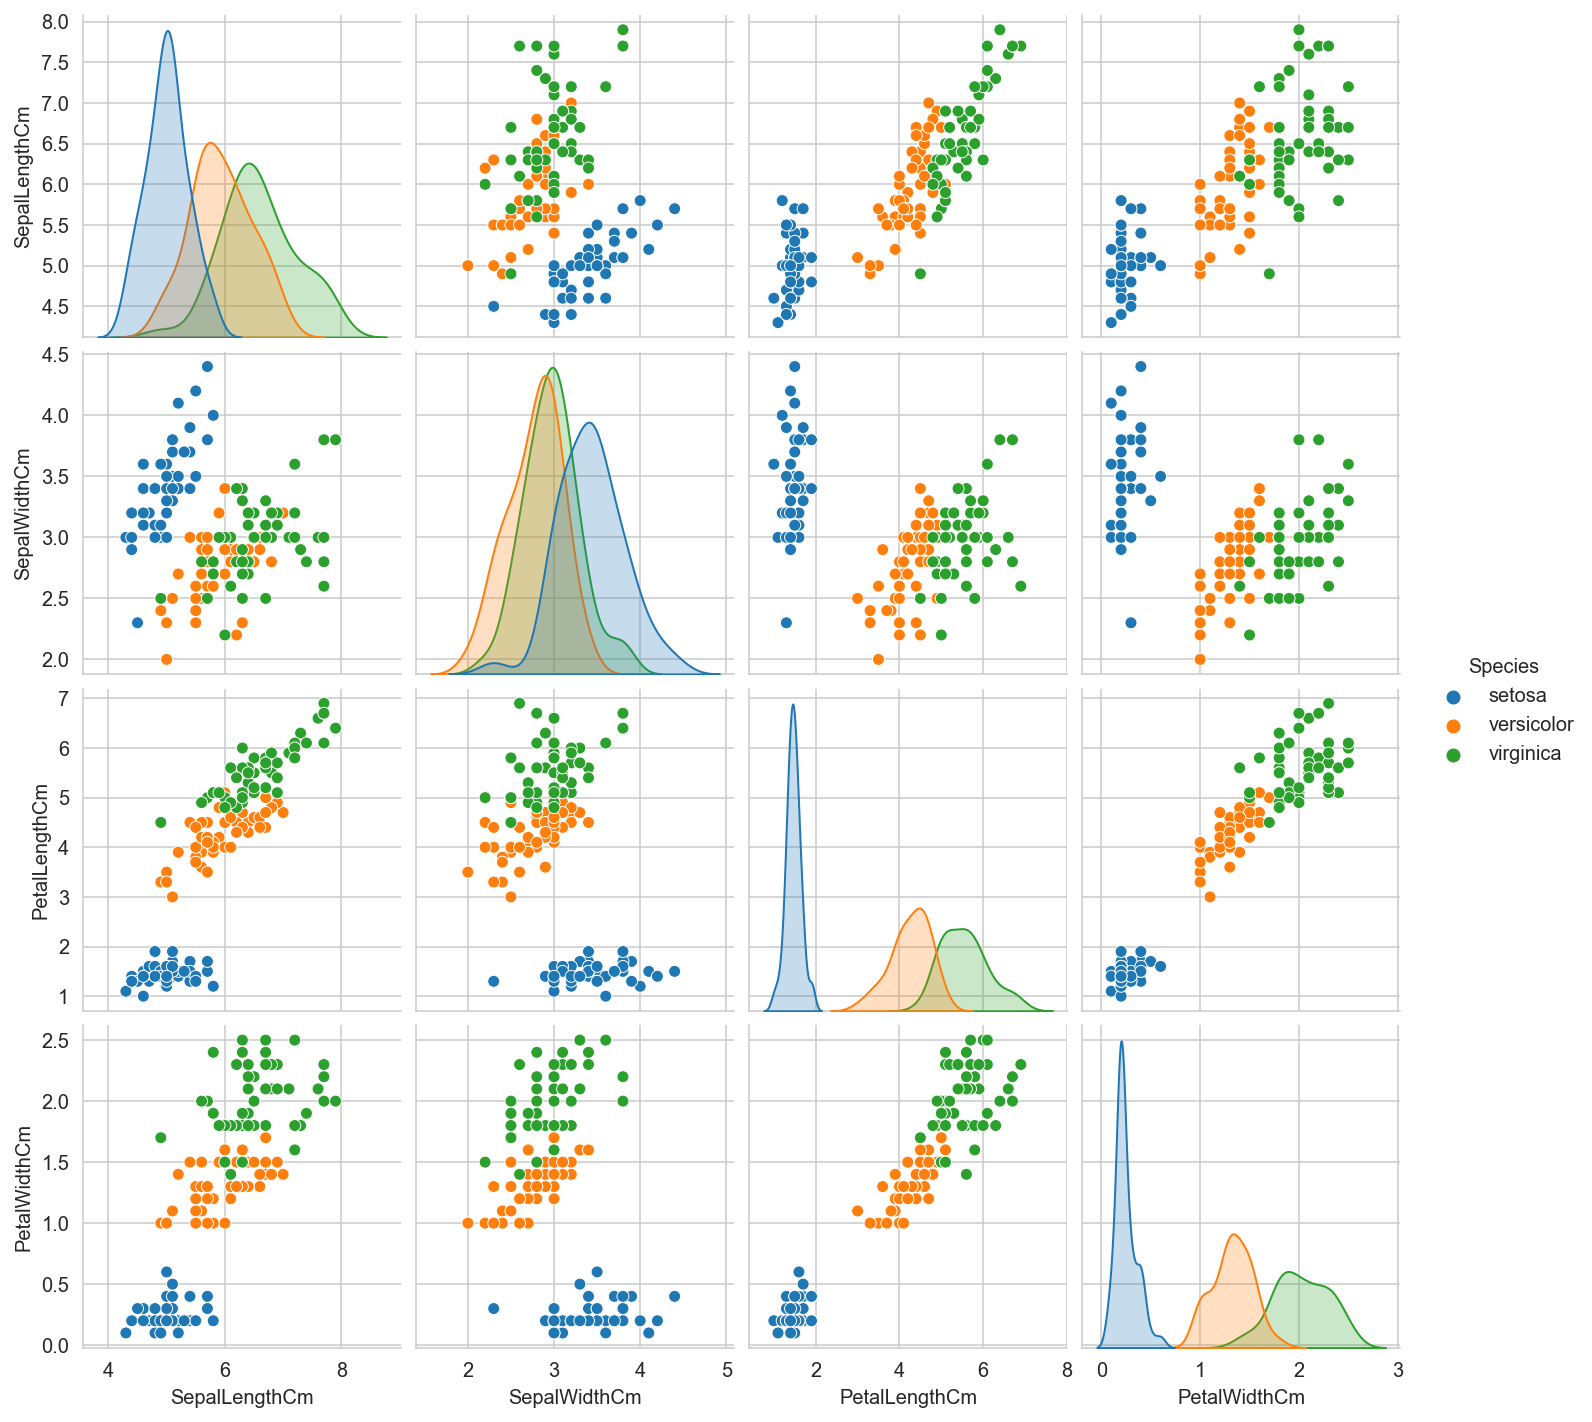

In [13]:
sns.pairplot(data, hue="Species")

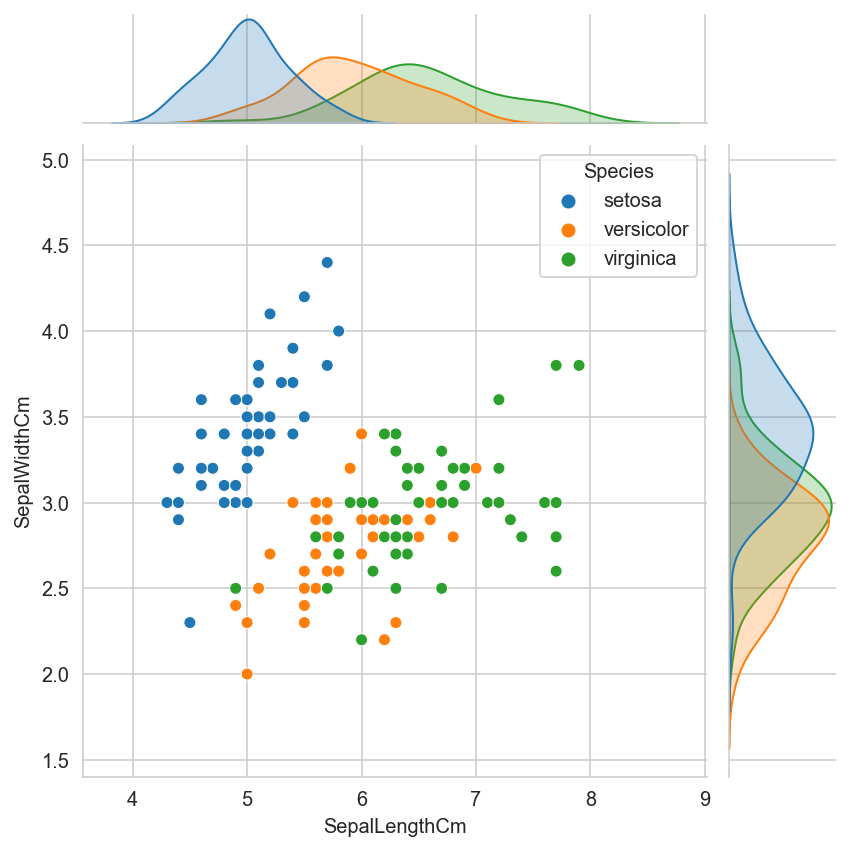

In [15]:
sns.jointplot(data=data, x="SepalLengthCm", y="SepalWidthCm", hue="Species");

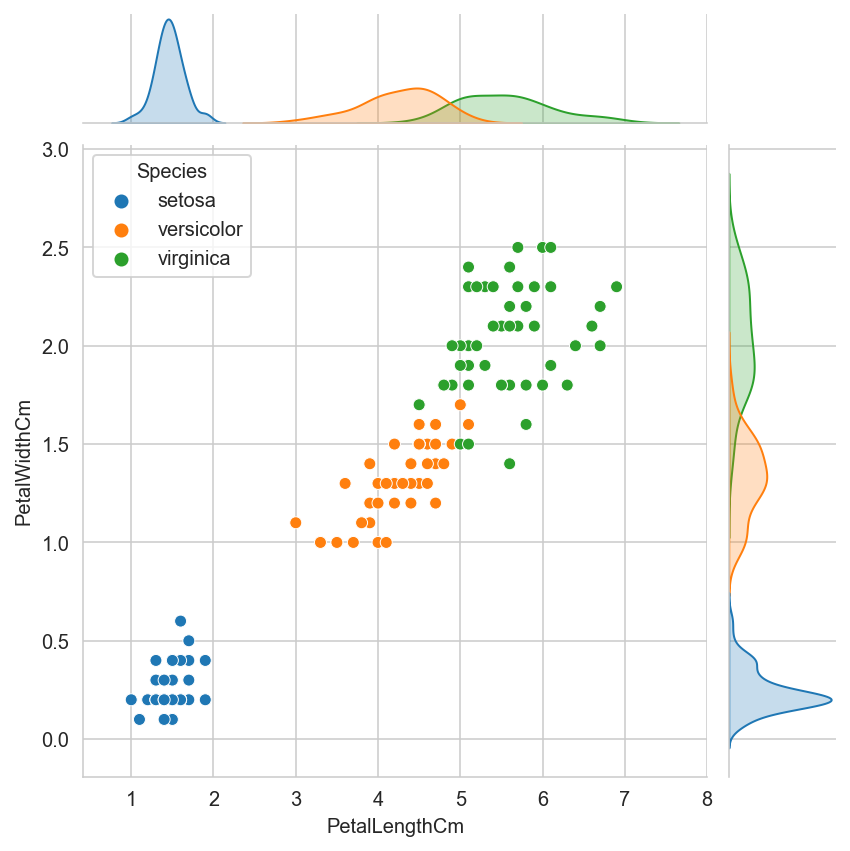

In [16]:
sns.jointplot(data=data, x="PetalLengthCm", y="PetalWidthCm", hue="Species");

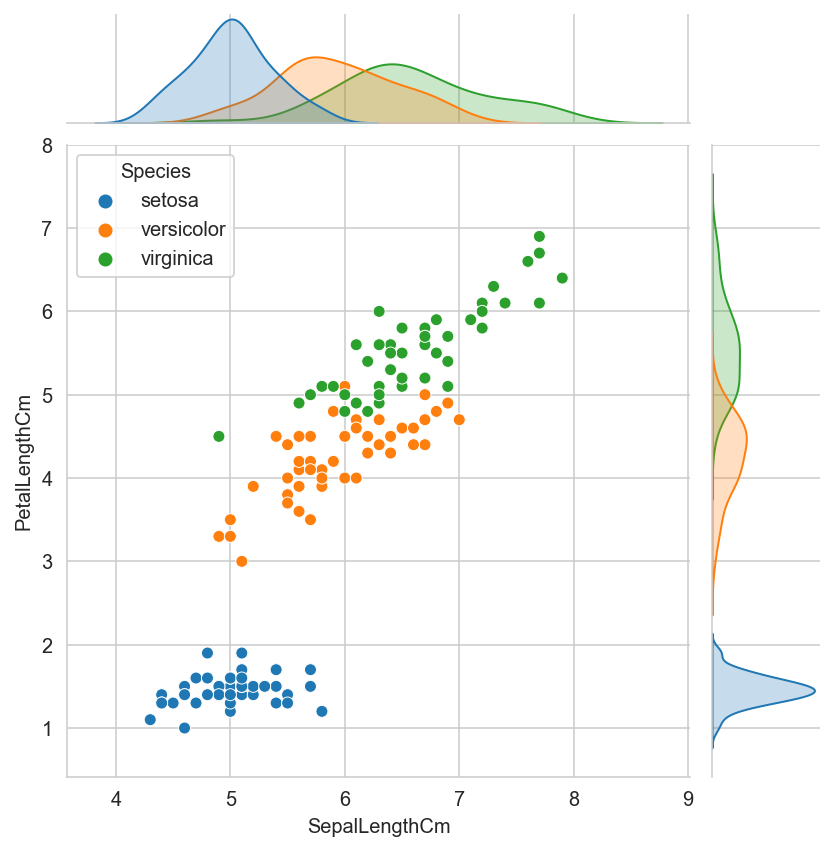

In [17]:
sns.jointplot(data=data, x="SepalLengthCm", y="PetalLengthCm", hue="Species");

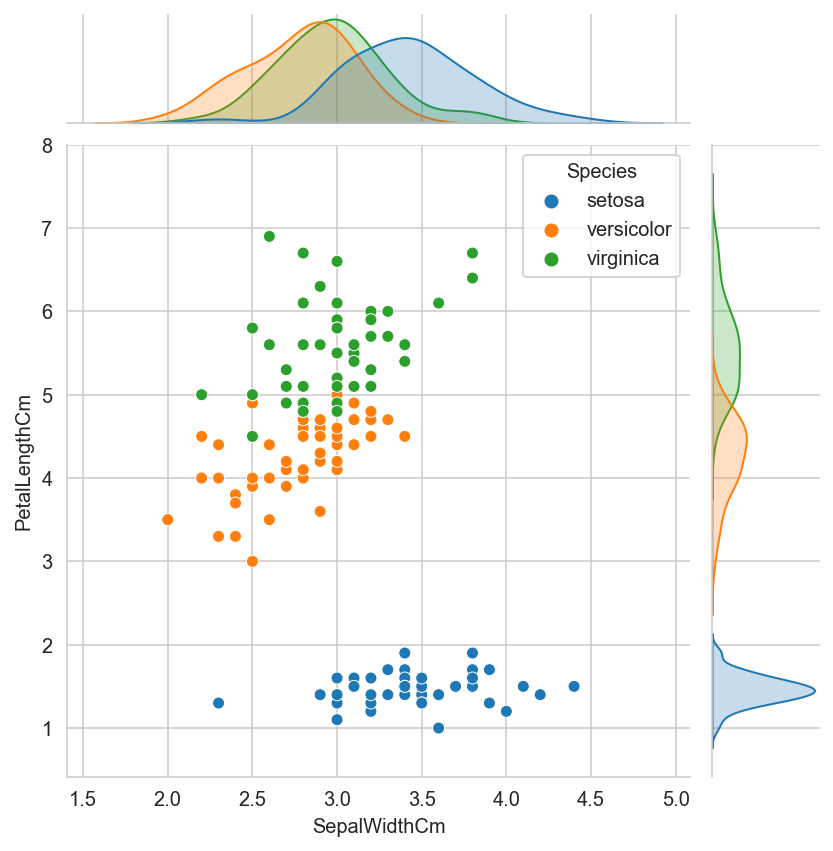

In [19]:
sns.jointplot(data=data, x="SepalWidthCm", y="PetalLengthCm", hue="Species");

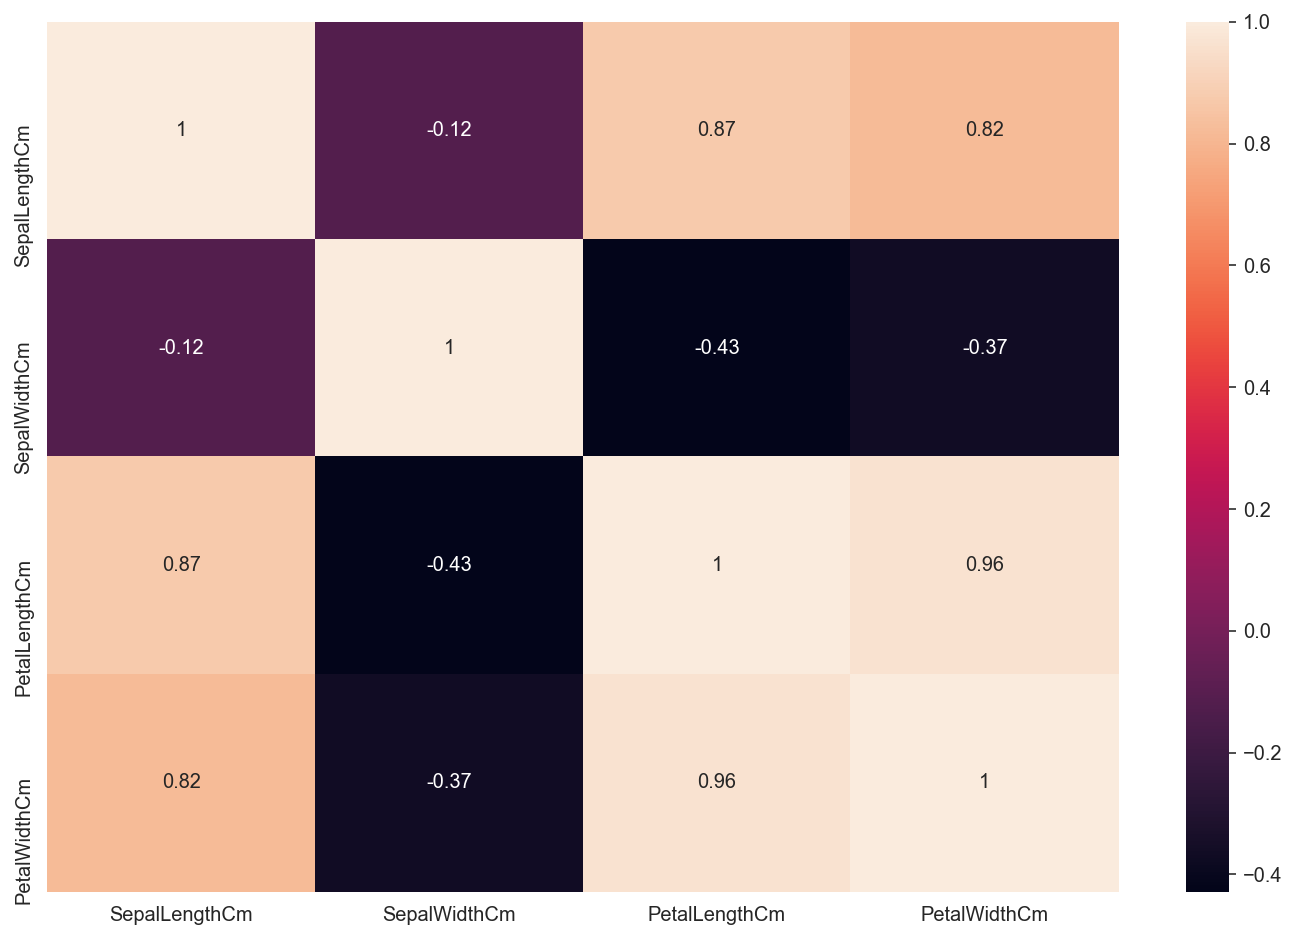

In [21]:
plt.subplots(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True);
plt.show();

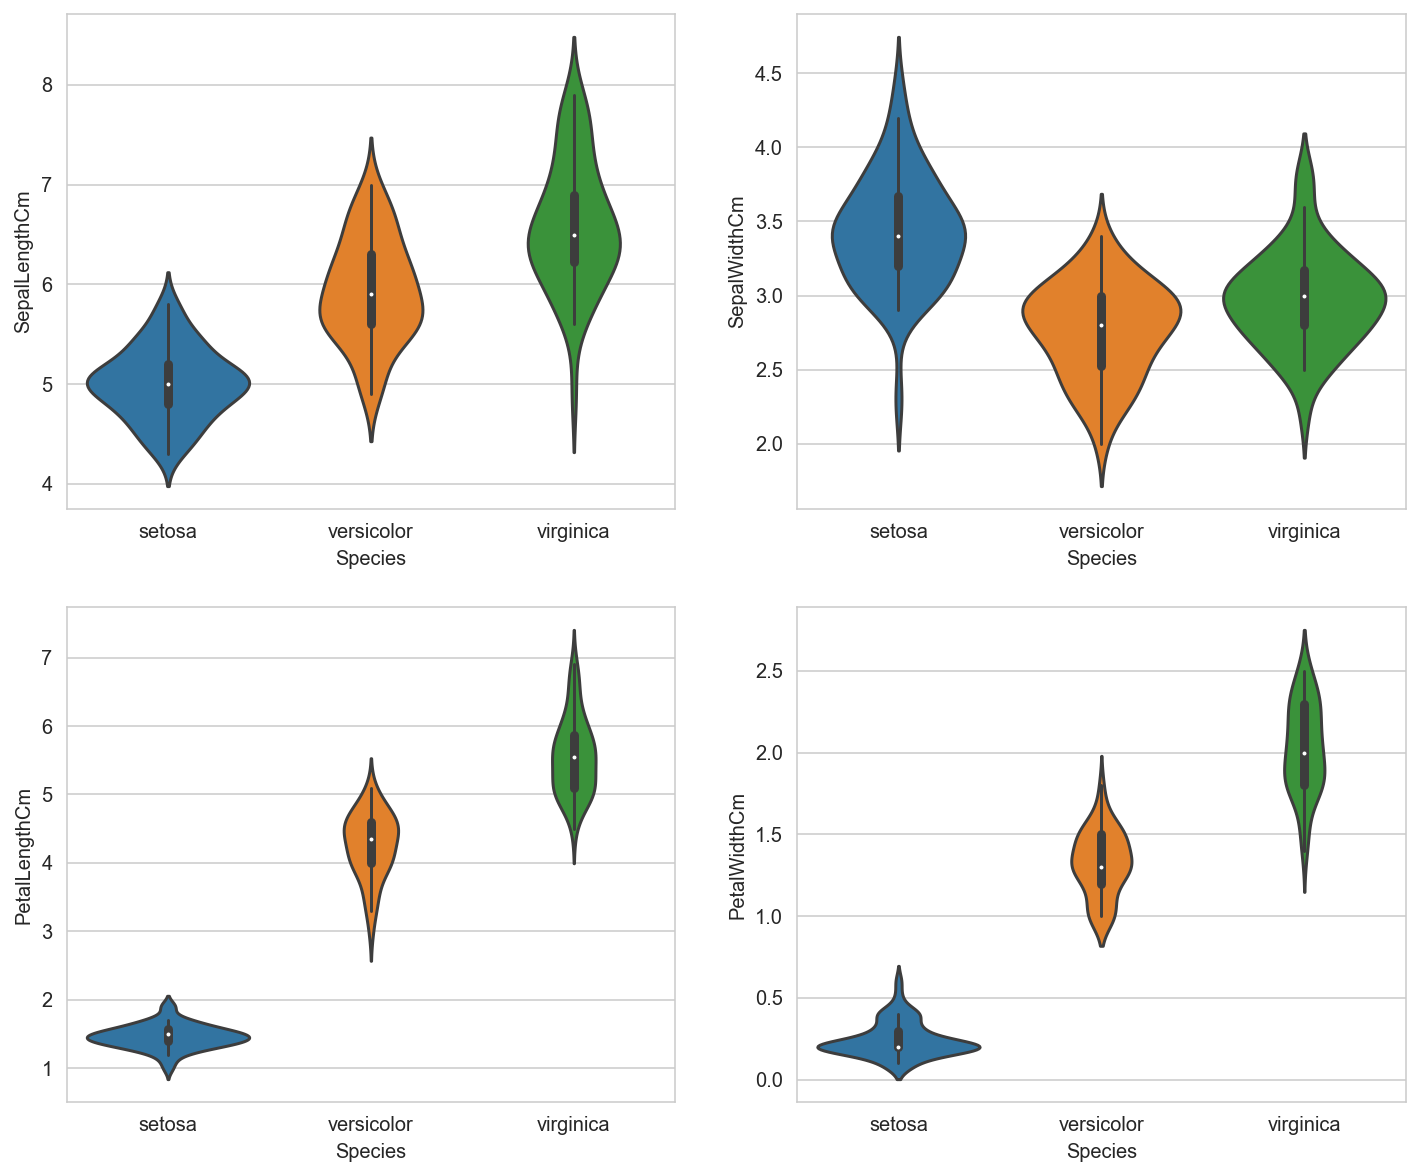

In [22]:
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.violinplot(x="Species", y="SepalLengthCm", data=data);
plt.subplot(2, 2, 2)
sns.violinplot(x="Species", y="SepalWidthCm", data=data);
plt.subplot(2, 2, 3)
sns.violinplot(x="Species", y="PetalLengthCm", data=data);
plt.subplot(2, 2, 4)
sns.violinplot(x="Species", y="PetalWidthCm", data=data);

In [23]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [24]:
X = data.drop("Species", axis=1)
y = data["Species"]

In [25]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
label_encoder.fit(y)
label_encoded_y = label_encoder.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, label_encoded_y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [27]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5


In [28]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

SVC(kernel='linear')

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = svm_clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]])

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [33]:
from sklearn.svm import LinearSVC

rbf_svc = SVC(kernel='rbf', gamma=0.7, C=1.0).fit(X_train, y_train)
poly_svc = SVC(kernel='poly', degree=3, C=1.0).fit(X_train, y_train)
lin_svc = LinearSVC(C=1.0).fit(X_train, y_train)

/Users/jordansamek/opt/miniconda3/envs/iris/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


ValueError: X.shape[1] = 2 should be equal to 4, the number of features at training time

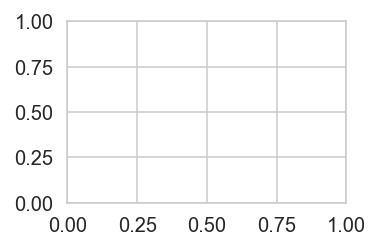

In [38]:
h = 0.02
# Create a mesh to plot in
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

# Title for the plots
titles = [
    'SVC with linear kernel',
    'LinearSVC (linear kernel)',
    'SVC with RBF kernel',
    'SVC with polynomial (degree 3) kernel'
]

for i, clf in enumerate((svm_clf, lin_svc, rbf_svc, poly_svc)):
    # plot the decision boundary, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max]
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # put the result in a color plot
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show();

In [39]:
print('Accuracy of SVC with linear kernel on training set: {:.2f}%'.format(svm_clf.score(X_train, y_train)*100))
print('Accuracy of LinearSVC on training set: {:.2f}%'.format(lin_svc.score(X_train, y_train)*100))
print('Accuracy of SVC with rbf kernel on training set: {:.2f}%'.format(rbf_svc.score(X_train, y_train)*100))
print('Accuracy of SVC with polynoimal (degree 3) on training set: {:.2f}%'.format(poly_svc.score(X_train, y_train)*100))

Accuracy of SVC with linear kernel on training set: 97.14%
Accuracy of LinearSVC on training set: 96.19%
Accuracy of SVC with rbf kernel on training set: 98.10%
Accuracy of SVC with polynoimal (degree 3) on training set: 98.10%


In [40]:
print('Accuracy of SVC with linear kernel on test set: {:.2f}%'.format(svm_clf.score(X_test, y_test)*100))
print('Accuracy of LinearSVC on test set: {:.2f}%'.format(lin_svc.score(X_test, y_test)*100))
print('Accuracy of SVC with rbf kernel on test set: {:.2f}%'.format(rbf_svc.score(X_test, y_test)*100))
print('Accuracy of SVC with polynoimal (degree 3) on test set: {:.2f}%'.format(poly_svc.score(X_test, y_test)*100))

Accuracy of SVC with linear kernel on test set: 100.00%
Accuracy of LinearSVC on test set: 100.00%
Accuracy of SVC with rbf kernel on test set: 100.00%
Accuracy of SVC with polynoimal (degree 3) on test set: 97.78%
